You are given a positive integer n, representing an n x n city. You are also given a 2D grid buildings, where buildings[i] = [x, y] denotes a unique building located at coordinates [x, y].

A building is covered if there is at least one building in all four directions: left, right, above, and below.

Return the number of covered buildings.

 

Example 1:

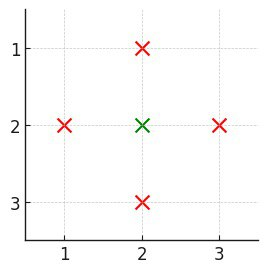

Input: n = 3, buildings = [[1,2],[2,2],[3,2],[2,1],[2,3]]

Output: 1

Explanation:

    Only building [2,2] is covered as it has at least one building:
        above ([1,2])
        below ([3,2])
        left ([2,1])
        right ([2,3])
    Thus, the count of covered buildings is 1.

Example 2:

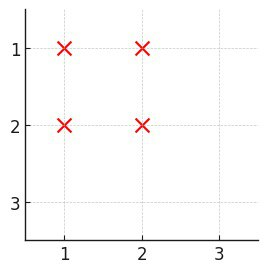

Input: n = 3, buildings = [[1,1],[1,2],[2,1],[2,2]]

Output: 0

Explanation:

    No building has at least one building in all four directions.

Example 3:

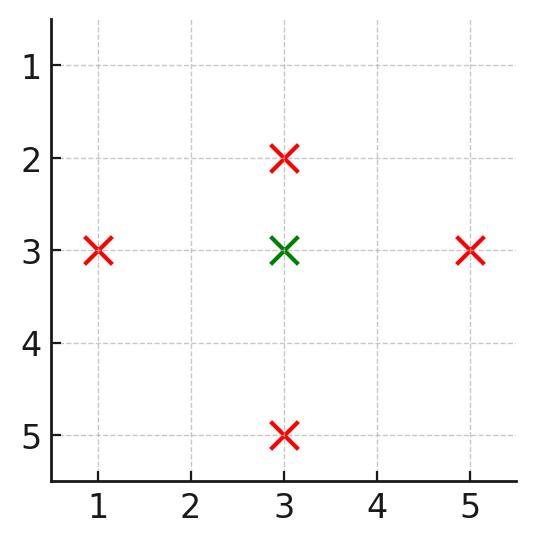

Input: n = 5, buildings = [[1,3],[3,2],[3,3],[3,5],[5,3]]

Output: 1

Explanation:

    Only building [3,3] is covered as it has at least one building:
        above ([1,3])
        below ([5,3])
        left ([3,2])
        right ([3,5])
    Thus, the count of covered buildings is 1.

 

Constraints:

    2 <= n <= 105
    1 <= buildings.length <= 105 
    buildings[i] = [x, y]
    1 <= x, y <= n
    All coordinates of buildings are unique.



In [ ]:
from sortedcontainers import SortedList

class Solution:
    def countCoveredBuildings(self, n: int, buildings: List[List[int]]) -> int:
        for_x = defaultdict(SortedList)
        for_y = defaultdict(SortedList)
        for x, y in buildings:
            for_x[x].add(y)
            for_y[y].add(x)
        
        ans = 0
        for x, y in buildings:
            y_pos = bisect.bisect_right(for_x[x], y)
            x_pos = bisect.bisect_right(for_y[y], x)
            if 1 < y_pos < len(for_x[x]) and 1 < x_pos < len(for_y[y]):
                ans += 1
        return ans

In [ ]:
class Solution:
    def countCoveredBuildings(self, n: int, buildings: List[List[int]]) -> int:
        for_x = {}
        for_y = {}
        for x, y in buildings:
            if x not in for_x:
                for_x[x] = [y, y]
            else:
                for_x[x] = [min(for_x[x][0], y), max(for_x[x][1], y)]
            if y not in for_y:
                for_y[y] = [x, x]
            else:
                for_y[y] = [min(for_y[y][0], x), max(for_y[y][1], x)]
        
        ans = 0
        for x, y in buildings:
            if for_x[x][0] < y < for_x[x][1] and for_y[y][0] < x < for_y[y][1]:
                ans += 1
        return ans